# Task 1 : Create a DataFrame from a Text File with Sentence-Label Pairs

<div class="task-panel-v2--description--15n8T">
    <div data-purpose="safely-set-inner-html:rich-text-viewer:html"
        class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding">
        <p>Construct a Pandas DataFrame from a text file that contains sentence-label pairs. Each line in the text file
            follows the format <code><strong>sentence@label</strong></code>. This task involves:</p>
        <ul>
            <li>
                <p>Reading data from 'Sentences_75Agree_sample.txt'.</p>
            </li>
            <li>
                <p>Parsing each line to separate sentences from labels.</p>
            </li>
            <li>
                <p>Creating a DataFrame with two columns: 'Sentence' and 'Label'.</p>
                <p><br></p>
            </li>
        </ul>
    </div>
</div>

In [1]:
# import pandas for data manipulation
import pandas as pd

In [2]:
# Open the text file and read all lines
with open('Sentences_75Agree_sample.txt', 'r', encoding='latin1') as file:
    lines = file.readlines()
lines[:5]

# To close the file automatically without calling the close() method, you use the 'with' statement as here
# '''
# https://www.pythontutorial.net/python-basics/python-read-text-file/
# The code in the previous examples works fine with ASCII text files. However, if you’re dealing with other languages such as Japanese, Chinese, and
# Korean, the text file is not a simple ASCII text file. And it’s likely a UTF-8 file that uses more than just the standard ASCII text characters.

# To open a UTF-8 text file, you need to pass the encoding='utf-8' to the open() function to instruct it to expect UTF-8 characters from the file.
# '''

['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .@neutral\n',
 'With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .@positive\n',
 "For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .@positive\n",
 'In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating profit by 34.9 % to EUR 23.5 mn .@positive\n',
 'Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales .@positive\n']

In [3]:
# Split each linr at '@' to separate sentences and labels and strip whitespaces
data = [line.strip().split('@') for line in lines]

In [4]:
data[:3]

[['According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .',
  'neutral'],
 ['With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .',
  'positive'],
 ["For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m .",
  'positive']]

In [5]:
df = pd.DataFrame(data, columns=['Sentence', 'Label'])

In [6]:
df.head()

,Sentence,Label
0,"According to Gran , the company has no plans t...",neutral
1,With the new production plant the company woul...,positive
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,"In the third quarter of 2010 , net sales incre...",positive
4,Operating profit rose to EUR 13.1 mn from EUR ...,positive


# Task 2: Visual Analysis of Label Distribution and Sentence Lengths in Text Data

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>In this task, you will analyze a preloaded dataset containing sentences and their corresponding labels. You will visualize the frequency of each label to understand the distribution of categories within the data. Additionally, you will calculate and plot the distribution of sentence lengths to gain insights into the variability of sentence construction within the dataset.</p><p><br></p></div>

In [7]:
# Pandas already imported and Matplotlib to be imported
import matplotlib.pyplot as plt

In [8]:
# Create Df for 'Label' column for Analysis and easy mannipulation
labels_df = pd.DataFrame(df.Label, columns=['Label'])
labels_df.head()

,Label
0,neutral
1,positive
2,positive
3,positive
4,positive


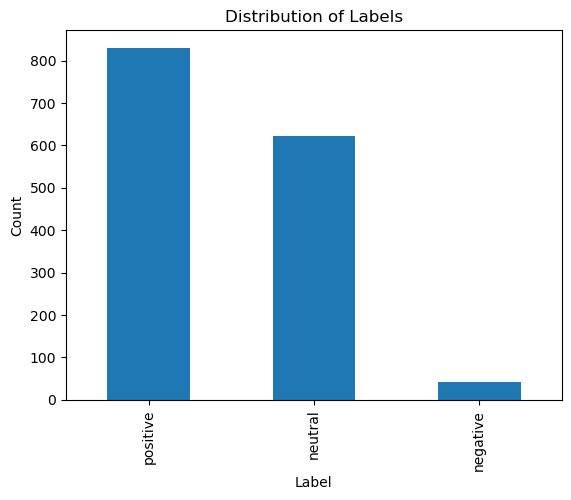

In [9]:
# Use a bar chart to visualize how frequently each labe occurs in the dataset
labels_df['Label'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [10]:
# Determine the number of words in each sentence to analyze sentence length
sentence_lengths = [len(sentence.split()) for sentence in df.Sentence]
sentence_lengths[:5]

[25, 33, 39, 29, 24]

[]

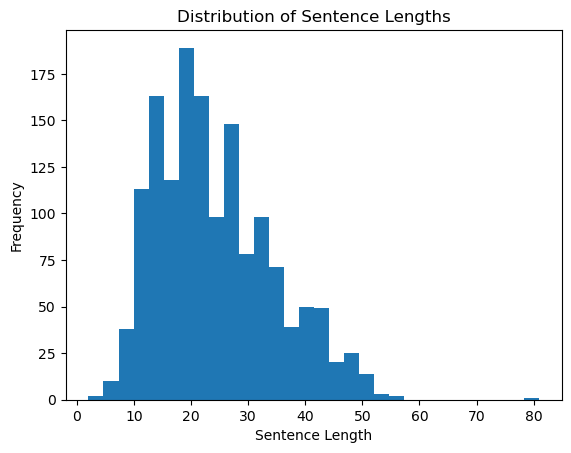

In [11]:
# Plot a histogram to show the distribution of sentence lengths in dataset
plt.hist(sentence_lengths, bins=30)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.plot()

# Task 3: Visualize Top 20 Most Frequent Words in Text Data

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>This task involves processing text data to extract and visualize the most frequently occurring words. By tokenizing the sentences and counting the occurrences of each word, you will identify the top 20 most common words in the dataset. Then, you will create a bar plot to visualize these words and their frequencies to understand the common vocabulary within your text data.</p><p><br></p></div>

In [12]:
# Import Counter for frequency analysis and seaborn for advanced plotting
from collections import Counter
import seaborn as sns

In [13]:
# Flatten the list of sentences into words
words = [word for sentence in df.Sentence for word in sentence.split()]
words[:10]

['According', 'to', 'Gran', ',', 'the', 'company', 'has', 'no', 'plans', 'to']

In [14]:
# Utilize Counter to find top 20 most common words
common_words = Counter(words).most_common(20)
common_words[:5]

[('.', 1463), (',', 1461), ('the', 1404), ('of', 1016), ('to', 901)]

In [15]:
# Create a Dataframe from the most common words for easy plotting with seaborn
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
common_words_df.head()

,Word,Frequency
0,.,1463
1,",",1461
2,the,1404
3,of,1016
4,to,901


[]

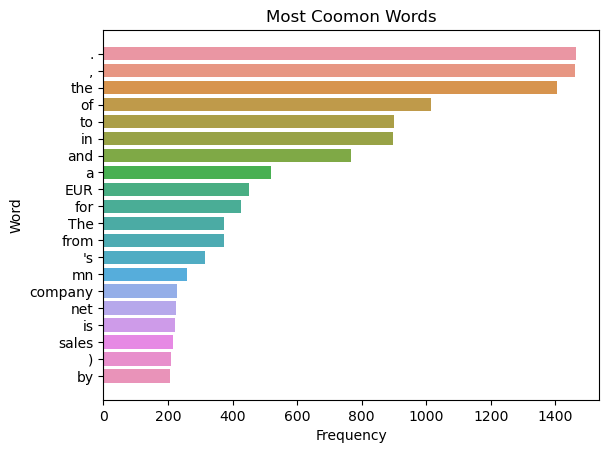

In [16]:
# Use Seaborn's barplot to create horizontal bar plot
sns.barplot(data=common_words_df, x='Frequency', y='Word')
plt.title('Most Coomon Words')
plt.plot()

# Task 4: Analyze and Visualize Most Frequent Bi-grams in Text Data

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>In this task, you will extract bi-grams from a corpus of sentences to discover common phrases or pairs of words. Using the CountVectorizer from the scikit-learn library, you will calculate the frequency of each bi-gram in the dataset. Then, you will sort these bi-grams by their frequency and visualize the top 20 most frequent bi-grams.</p><p><br></p></div>

In [17]:
# '''
# In the Bigram Language Model, we find bigrams, which are two words coming together in the corpus(the entire collection of words/sentences).

# For example: In the sentence, Edpresso is awesome, and user-friendly the bigrams are :

# “Edpresso is”
# “is awesome”
# “and user”
# “user friendly”
# '''

In [18]:
# Import CountVectorizer for text feature extraction and Seaborn for plotting
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
# Set up CountVectorizer to consider bi0grams only
vectorizer = CountVectorizer(ngram_range=(2,2))
vectorizer

CountVectorizer(ngram_range=(2, 2))

In [20]:
# Apply the vectorizer to the sentences to get the bi-gram counts
ngram_counts = vectorizer.fit_transform(df.Sentence)
ngram_counts

<1492x17758 sparse matrix of type '<class 'numpy.int64'>'
	with 28938 stored elements in Compressed Sparse Row format>

In [21]:
# Aggregate counts and get feature names (bi-grams)
ngram_sum = ngram_counts.sum(axis=0)
ngram_list = [(ngram, ngram_sum[0, idx]) for ngram, idx in vectorizer.vocabulary_.items()]
ngram_list[:5]

[('according to', 30),
 ('to gran', 1),
 ('gran the', 1),
 ('the company', 165),
 ('company has', 12)]

In [22]:
# Sort the bi-grams by their frequency count in descending order
common_ngrams = sorted(ngram_list, key=lambda x: x[1], reverse=True)[:20]

In [23]:
# Create a DataFrame for the most common bi-grams to facilitate visualization
common_ngrams_df = pd.DataFrame(common_ngrams, columns=['N-gram', 'Frequency'])
common_ngrams_df.head()

,N-gram,Frequency
0,in the,264
1,of the,186
2,for the,175
3,the company,165
4,net sales,143


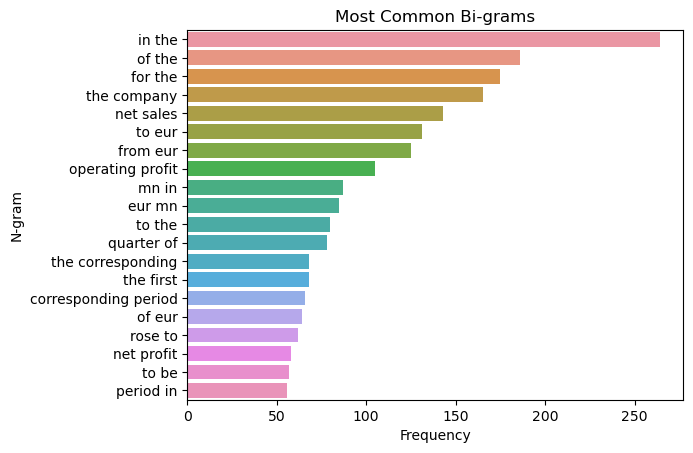

In [24]:
# Use seaborn to create a bar plot for the bi-gram frequencies
sns.barplot(data=common_ngrams_df, x='Frequency', y='N-gram')
plt.title('Most Common Bi-grams')  # Adding a title to the plot
plt.show()                          # Display the visualization

# Task 5: Analyze Sentiment Distribution Using Positive and Negative Word Counts

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>In this task, you will conduct a simple sentiment analysis by tallying the occurrences of predefined positive and negative sentiment words in a collection of sentences. The goal is to obtain a rough estimate of the sentiment distribution within the text data. To complete the task:</p><ul><li><p>Create two lists: one containing words that are typically associated with 6 positive sentiments (e.g., good, great, positive), and another with 6 words associated with negative sentiments&nbsp; (e.g., bad, poor, down).</p></li><li><p>Calculate the frequency of Sentiment Words</p></li><li><p>Plot the Counts of Sentiment Words</p><p><br></p></li></ul></div>

In [25]:
# Create lists of words associated with positive and negative sentiments
positive_words = ['good', 'great', 'positive', 'profit', 'up', 'increase']
negative_words = ['bad', 'poor', 'negative', 'loss', 'down', 'decrease']

In [26]:
# Calculate the frequency of positive and negative words in the dataset
positive_counts = sum([sentence.lower().count(word) for sentence in df['Sentence'] for word in positive_words])
negative_counts = sum([sentence.lower().count(word) for sentence in df['Sentence'] for word in negative_words])

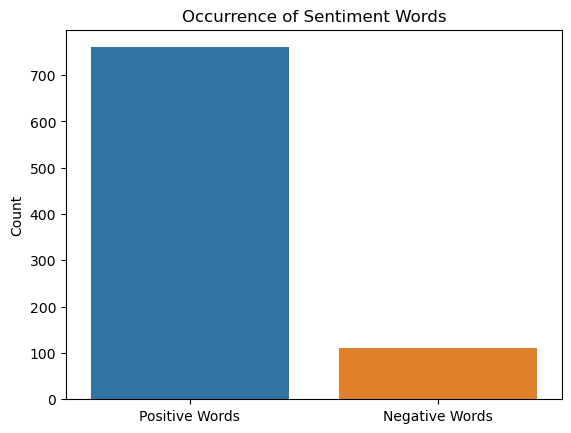

In [27]:
# Use seaborn to create a bar plot showing the counts of positive and negative sentiment words
sns.barplot(x=['Positive Words', 'Negative Words'], y=[positive_counts, negative_counts])
plt.title('Occurrence of Sentiment Words')  # Set the title of the plot
plt.ylabel('Count')                          # Set the y-axis label
plt.show()                                   # Display the plot

# Task 6: Text Data Preprocessing for Sentiment Analysis Model

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>Your task is to clean and transform sentences from a dataset so that they can be used by a machine learning model. Specifically, you need to:</p><ul><li><p>Clean the sentences in the dataset.</p></li><li><p>Convert the cleaned sentences into a format suitable for machine learning (TF-IDF).</p></li><li><p>Change text labels into numbers.</p></li><li><p>Split the data into training and testing sets, with a&nbsp; test size of 20% and a random state set to 1502.</p></li><li><p>Make sure the data is in the right format for the machine learning model to process.</p><p><br></p></li></ul></div>

In [28]:
# Start by defining a function to clean the text data, aiming to standardize it for analysis.
import re

# Function to clean text data
def clean_text(text):
    text = re.sub(r"[^\w\s]", '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\s+", ' ', text)  # Collapse multiple spaces to one
    return text.strip()  # Remove leading and trailing spaces

In [29]:
df['Sentence'].head()

0    According to Gran , the company has no plans t...
1    With the new production plant the company woul...
2    For the last quarter of 2010 , Componenta 's n...
3    In the third quarter of 2010 , net sales incre...
4    Operating profit rose to EUR 13.1 mn from EUR ...
Name: Sentence, dtype: object

In [30]:
# Apply the text cleaning function to each sentence in your DataFrame.
# Clean sentences in the DataFrame
df['Cleaned_Sentence'] = df['Sentence'].apply(clean_text)
df.head()

,Sentence,Label,Cleaned_Sentence
0,"According to Gran , the company has no plans t...",neutral,according to gran the company has no plans to ...
1,With the new production plant the company woul...,positive,with the new production plant the company woul...
2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of 2010 componenta s net ...
3,"In the third quarter of 2010 , net sales incre...",positive,in the third quarter of 2010 net sales increas...
4,Operating profit rose to EUR 13.1 mn from EUR ...,positive,operating profit rose to eur 131 mn from eur 8...


In [31]:
# Use TF-IDF Vectorizer to transform cleaned sentences into numerical vectors.
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize and apply TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Sentence'])
X

<1492x5543 sparse matrix of type '<class 'numpy.float64'>'
	with 27277 stored elements in Compressed Sparse Row format>

In [32]:
# Encode the textual labels to numeric form using the LabelEncoder.
from sklearn.preprocessing import LabelEncoder

# Encode labels to integers
encoder = LabelEncoder()
y = encoder.fit_transform(df['Label'])
y

array([1, 2, 2, ..., 2, 2, 2])

In [33]:
# Split your data into a training set and a testing set with an 80-20 split.
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1502)
X_train

<1193x5543 sparse matrix of type '<class 'numpy.float64'>'
	with 21874 stored elements in Compressed Sparse Row format>

In [34]:
# Convert the sparse matrix from vectorization into a dense matrix for model compatibility.
# Convert sparse matrices to dense for the model input
X_train_dense = X_train.todense()
X_test_dense = X_test.todense()
X_train_dense

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

# Task 7: Develop and Visualize a TensorFlow Model for Multi-Class Classification

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>In this task, you will build a multi-class classification neural network model using TensorFlow and visualize its performance. You are expected to construct a Sequential model with parameters such as the number of neurons, activation functions, and output units aligned with the dataset's characteristics. You will then compile, train, and evaluate the model, followed by plotting the accuracy and loss for both training and validation data.</p><p>The specific parameters and steps for this task include:</p><ul><li><p>Construct a<strong> Sequential model </strong>with the following layers:</p></li></ul><ol><li><p>Dense layer with 64 neurons and ReLU activation.</p></li><li><p>Dropout layer with a 50% drop rate.</p></li><li><p>Dense output layer with 3 neurons (one for each class: Positive, Neutral, Negative) using the softmax activation function.</p></li></ol><ul><li><p>Compile the model using the Adam optimizer, sparse categorical cross-entropy loss, and accuracy as the metric.</p></li><li><p>Summarize the model architecture using the <code><strong>model.summary()</strong></code> method.</p></li><li><p>Train the model for 10 epochs with a batch size of 32, including validation data.</p></li><li><p>Evaluate the model's performance on the test data and print out the loss and accuracy.</p></li><li><p>Plot the training and validation accuracy, as well as the loss over epochs.</p><p><br></p></li></ul></div>

In [35]:
# Initialize the TensorFlow Sequential model:
# Import TensorFlow
import tensorflow as tf

# Define the Sequential model with specified layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # 64-neuron layer
    tf.keras.layers.Dropout(0.5),  # Dropout for regularization
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer for 3 classes
])

In [36]:
# Compile the Sequential model:
# Compile the model with an optimizer, loss function, and evaluation metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
# Display the model's architecture:
# Output the model summary to understand its structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                354816    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 355,011
Trainable params: 355,011
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Train the model with the dataset:
# Fit the model to the training data, validating against the test data
history = model.fit(X_train_dense, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test_dense, y_test))

Epoch 1/10


2024-02-04 12:10:53.577697: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


38/38 [==============================] - 0s 3ms/step - loss: 1.0148 - accuracy: 0.5759 - val_loss: 0.9192 - val_accuracy: 0.5518
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.8136 - accuracy: 0.6354 - val_loss: 0.7673 - val_accuracy: 0.5920
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.7930 - val_loss: 0.6680 - val_accuracy: 0.7993
Epoch 4/10
38/38 [==============================] - 0s 1ms/step - loss: 0.5266 - accuracy: 0.8801 - val_loss: 0.5948 - val_accuracy: 0.8227
Epoch 5/10
38/38 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.9128 - val_loss: 0.5399 - val_accuracy: 0.8328
Epoch 6/10
38/38 [==============================] - 0s 1ms/step - loss: 0.3328 - accuracy: 0.9380 - val_loss: 0.5035 - val_accuracy: 0.8428
Epoch 7/10
38/38 [==============================] - 0s 1ms/step - loss: 0.2662 - accuracy: 0.9464 - val_loss: 0.4749 - val_accuracy: 0.8361
Epoch 8/10
38/38 [=============

In [39]:
# Evaluate the trained model's performance:
# Evaluate the model on test dataset
loss, accuracy = model.evaluate(X_test_dense, y_test)
# Print loss and accuracy
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

10/10 [==============================] - 0s 770us/step - loss: 0.4264 - accuracy: 0.8395
Loss: 0.42643842101097107
Accuracy: 0.8394649028778076


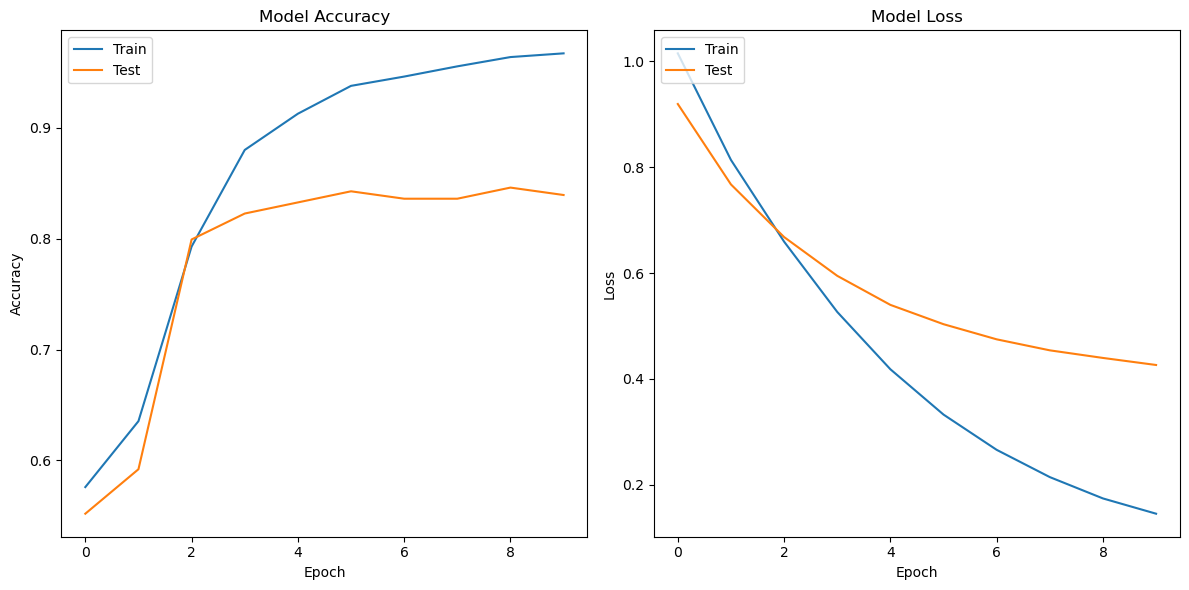

In [40]:
# Visualize the training and validation metrics:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Set up the plotting environment
plt.figure(figsize=(12,6))

# Plot accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

# Task 8: Optimize Neural Network Hyperparameters Using Keras Tuner

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>This task involves using Keras Tuner to find the optimal hyperparameters for a multi-class classification neural network model. You will set up a hypermodel function that defines the model architecture and the hyperparameter space to explore. The tuner will then run multiple trials to determine the best combination of neurons in the dense layer, activation function, and dropout rate to achieve the highest validation accuracy.</p><p>The task parameters are:</p><ul><li><p>The number of units in the dense layer ranging from 64 to 512 with a step size of 64.</p></li><li><p>Activation function choices between 'relu' and 'tanh'.</p></li><li><p>Dropout rate from 0.0 to 0.5 with a step size of 0.1.</p></li><li><p>A maximum of 20 trials, with each trial executed 3 times to average out the performance variability.</p></li><li><p><br></p></li></ul></div>


In [41]:
pip install keras-tuner==1.4.5

Note: you may need to restart the kernel to use updated packages.


In [42]:
# Import the required library:
# Import Keras Tuner
import keras_tuner as kt

Using TensorFlow backend


In [43]:
# Define the hypermodel function:

# Function to build the model given hyperparameters
def build_model_step1(hp):
    model = tf.keras.Sequential()
    # Dense layer where the number of units is a hyperparameter
    model.add(tf.keras.layers.Dense(
        units=hp.Int('units', min_value=64, max_value=512, step=64),
        activation=hp.Choice('activation', values=['relu', 'tanh']),
        input_shape=(X_train.shape[1],)
    ))
    # Dropout layer where the rate is a hyperparameter
    model.add(tf.keras.layers.Dropout(
        rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
    ))
    # Output layer with fixed settings
    model.add(tf.keras.layers.Dense(3, activation='softmax'))
    # Compile the model with default optimizer and loss function
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [44]:
# Configure and run the hyperparameter search:

# Initialize the random search tuner
tuner_step1 = kt.RandomSearch(
    build_model_step1,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=3,
    directory='tuner_step1_directory',
    project_name='step1_tuning'
)

In [45]:
# Start the hyperparameter tuning

# Execute the search over the specified epochs and validation data
tuner_step1.search(X_train_dense,
                   y_train,
                   epochs=10,
                   validation_data=(X_test_dense,
                                    y_test))

Trial 20 Complete [00h 00m 05s]
val_accuracy: 0.8539576331774393

Best val_accuracy So Far: 0.8595317602157593
Total elapsed time: 00h 01m 39s


In [46]:
# Review the search results :

# Output the summary of the hyperparameter tuning results
tuner_step1.results_summary()

Results summary
Results in tuner_step1_directory/step1_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 04 summary
Hyperparameters:
units: 384
activation: relu
dropout_rate: 0.2
Score: 0.8595317602157593

Trial 06 summary
Hyperparameters:
units: 384
activation: relu
dropout_rate: 0.1
Score: 0.8595317602157593

Trial 03 summary
Hyperparameters:
units: 320
activation: relu
dropout_rate: 0.0
Score: 0.8584169348080953

Trial 14 summary
Hyperparameters:
units: 384
activation: relu
dropout_rate: 0.30000000000000004
Score: 0.8584169348080953

Trial 00 summary
Hyperparameters:
units: 512
activation: relu
dropout_rate: 0.1
Score: 0.8561872839927673

Trial 10 summary
Hyperparameters:
units: 448
activation: relu
dropout_rate: 0.1
Score: 0.8561872839927673

Trial 13 summary
Hyperparameters:
units: 320
activation: tanh
dropout_rate: 0.30000000000000004
Score: 0.8550724585851034

Trial 12 summary
Hyperparameters:
units: 64
activation: tanh
dropout_rate: 0.2
Score:

In [47]:
# Extract and print the best hyperparameters:

# Get the best set of hyperparameters
best_hps_step1 = tuner_step1.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"""
Units: {best_hps_step1.get('units')}
Activation: {best_hps_step1.get('activation')}
Dropout Rate: {best_hps_step1.get('dropout_rate')}
""")


Units: 384
Activation: relu
Dropout Rate: 0.2



# Task 9: Refine Neural Network Model with Secondary Hyperparameter Tuning

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>In this task, you will leverage the foundational work completed in the initial hyperparameter tuning step to further refine our Natural Language Processing (NLP) model. Your objective is to optimize the model's architecture and training configuration by introducing a second layer of hyperparameter tuning. This iterative process is designed to hone in on the best model configuration for sentiment analysis accuracy.</p><p><strong>Steps to Accomplish:</strong></p><ol><li><p><strong>Model Setup:</strong></p><ul><li><p>Utilize the <code><strong>build_model_step2</strong></code> function to construct a <code><strong>Sequential</strong></code> model.</p></li><li><p>Begin by adding a dense layer using the optimal hyperparameters (<code><strong>units</strong></code> and <code><strong>activation</strong></code>) identified from step 1 of tuning.</p></li><li><p>Incorporate a dropout layer to mitigate overfitting, again using the best dropout rate from the previous tuning step.</p></li></ul></li><li><p><strong>Hyperparameter Expansion:</strong></p><ul><li><p>Define a new hyperparameter within the dense layer to determine the ideal number of <code><strong>second_units</strong></code>. Use the provided range as your search space.</p></li><li><p>Introduce two new hyperparameters for the model: <code><strong>optimizer</strong></code> and <code><strong>learning_rate</strong></code>. You'll choose between <code><strong>adam</strong></code> and <code><strong>sgd</strong></code> for the optimizer, and among three different learning rates.</p></li></ul></li><li><p><strong>Conditional Logic Application:</strong></p><ul><li><p>Apply conditional logic to instantiate the selected optimizer with the appropriate learning rate.</p></li><li><p>Compile the model with the chosen hyperparameters, employing <code><strong>sparse_categorical_crossentropy</strong></code> as the loss function and tracking <code><strong>accuracy</strong></code> as the metric.</p></li></ul></li><li><p><strong>Tuner Initialization:</strong></p><ul><li><p>Initialize a second hyperparameter tuner (<code><strong>tuner_step2</strong></code>) using a <code><strong>RandomSearch</strong></code> strategy.</p></li><li><p>Configure this tuner with the specified search space, trial limitations, and directory setup for storing results.</p></li></ul></li><li><p><strong>Model Optimization:</strong></p><ul><li><p>Execute the hyperparameter search with the training and validation datasets provided, iterating through the specified number of epochs.</p></li><li><p>Upon completion, invoke the <code><strong>results_summary</strong></code> method to output a summary of the hyperparameter tuning results.</p><p><br></p></li></ul></li></ol></div>

In [48]:
# Define the function to build the refined model:

def build_model_step2(hp):
    model = tf.keras.Sequential()
    # Add the first layer with the best hyperparameters from step 1
    model.add(tf.keras.layers.Dense(
        units=tuner_step1.get_best_hyperparameters()[0].get('units'),
        activation=tuner_step1.get_best_hyperparameters()[0].get('activation'),
        input_shape=(X_train.shape[1],)
    ))
    # Add the dropout layer with the best hyperparameter from step 1
    model.add(tf.keras.layers.Dropout(
        rate=tuner_step1.get_best_hyperparameters()[0].get('dropout_rate')
    ))
    # Add a second dense layer where the number of units is a new hyperparameter to tune
    model.add(tf.keras.layers.Dense(
        units=hp.Int('second_units', min_value=32, max_value=512, step=32),
        activation='softmax'
    ))

    # Set optimizer and learning rate as new hyperparameters to tune
    optimizer_selected = hp.Choice('optimizer', values=['adam', 'sgd'])
    learning_rate_selected = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Conditional logic to instantiate the selected optimizer with the selected learning rate
    if optimizer_selected == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate_selected)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate_selected)

    # Compile the model with the selected optimizer, loss, and metric
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [49]:
# Initialize and run the second hyperparameter search:

# Initialize the second tuner with a new search space
tuner_step2 = kt.RandomSearch(
    build_model_step2,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=3,
    directory='tuner_step2_directory',
    project_name='step2_tuning'
)

# Execute the search with the same training and validation data
tuner_step2.search(X_train_dense, y_train, epochs=10, validation_data=(X_test_dense, y_test))

Trial 20 Complete [00h 00m 07s]
val_accuracy: 0.8584169348080953

Best val_accuracy So Far: 0.8595317602157593
Total elapsed time: 00h 02m 09s


In [50]:
# Review the search results from the second tuning step:

# Output the summary of the hyperparameter tuning results from step 2
tuner_step2.results_summary()

Results summary
Results in tuner_step2_directory/step2_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
second_units: 448
optimizer: adam
learning_rate: 0.001
Score: 0.8595317602157593

Trial 19 summary
Hyperparameters:
second_units: 160
optimizer: adam
learning_rate: 0.001
Score: 0.8584169348080953

Trial 14 summary
Hyperparameters:
second_units: 96
optimizer: adam
learning_rate: 0.001
Score: 0.8539576331774393

Trial 03 summary
Hyperparameters:
second_units: 320
optimizer: adam
learning_rate: 0.001
Score: 0.8506131569544474

Trial 05 summary
Hyperparameters:
second_units: 224
optimizer: adam
learning_rate: 0.01
Score: 0.8494983315467834

Trial 01 summary
Hyperparameters:
second_units: 352
optimizer: adam
learning_rate: 0.01
Score: 0.8483835061391195

Trial 09 summary
Hyperparameters:
second_units: 192
optimizer: adam
learning_rate: 0.01
Score: 0.8472686608632406

Trial 12 summary
Hyperparameters:
second_units: 448
optimi

# Task 10: Build and Save the Final Tuned Neural Network Model

<div data-purpose="safely-set-inner-html:rich-text-viewer:html" class="lab-rich-text-viewer--lab-html-content--22XsM rt-scaffolding"><p>In this final task, you will build a final neural network model using the best hyperparameters obtained from your comprehensive two-step hyperparameter tuning process. Once the model is configured and trained, you will save it for future use, allowing for quick deployment or further analysis without the need to retrain.</p><p>Task Steps:</p><ul><li><p><strong>Construct the final model</strong> using the best hyperparameters identified through the Keras Tuner.</p></li><li><p><strong>Train the final model</strong> using the full training dataset.</p></li><li><p><strong>Evaluate the model's performance</strong> on the test dataset to confirm its accuracy.</p></li><li><p><strong>Save the final trained model </strong>to a file.</p><p><br></p></li></ul></div>

In [51]:
# Define and build the final model:

def build_final_model(best_hps_step1, best_hps_step2):
    model = tf.keras.Sequential()

    # First dense layer with best units and activation from step 1
    model.add(tf.keras.layers.Dense(
        units=best_hps_step1.get('units'),
        activation=best_hps_step1.get('activation'),
        input_shape=(X_train.shape[1],)
    ))

    # Dropout layer with the best rate from step 1
    model.add(tf.keras.layers.Dropout(best_hps_step1.get('dropout_rate')))

    # Second dense layer with best units from step 2
    model.add(tf.keras.layers.Dense(
        units=best_hps_step2.get('second_units'),
        activation='softmax'
    ))

    # Set the optimizer with the best type and learning rate from step 2
    if best_hps_step2.get('optimizer') == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=best_hps_step2.get('learning_rate'))
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=best_hps_step2.get('learning_rate'))

    # Compile the model
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Retrieve the best hyperparameters from the first tuner
best_hps_step1 = tuner_step1.get_best_hyperparameters()[0]

# Retrieve the best hyperparameters from the second tuner
best_hps_step2 = tuner_step2.get_best_hyperparameters()[0]

# Build the final model using the best hyperparameters from both tuning steps
final_model = build_final_model(best_hps_step1, best_hps_step2)

In [52]:
# Train the final model:

# Train the final model with the training data
history_final = final_model.fit(
    X_train_dense,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_dense, y_test)
)

Epoch 1/10
38/38 [==============================] - 0s 7ms/step - loss: 5.3166 - accuracy: 0.5574 - val_loss: 3.6633 - val_accuracy: 0.5485
Epoch 2/10
38/38 [==============================] - 0s 5ms/step - loss: 1.5511 - accuracy: 0.6521 - val_loss: 0.7730 - val_accuracy: 0.7324
Epoch 3/10
38/38 [==============================] - 0s 5ms/step - loss: 0.5837 - accuracy: 0.8676 - val_loss: 0.6335 - val_accuracy: 0.7726
Epoch 4/10
38/38 [==============================] - 0s 6ms/step - loss: 0.3951 - accuracy: 0.9279 - val_loss: 0.5411 - val_accuracy: 0.8261
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 0.2572 - accuracy: 0.9514 - val_loss: 0.4823 - val_accuracy: 0.8428
Epoch 6/10
38/38 [==============================] - 0s 5ms/step - loss: 0.1673 - accuracy: 0.9690 - val_loss: 0.4545 - val_accuracy: 0.8462
Epoch 7/10
38/38 [==============================] - 0s 5ms/step - loss: 0.1112 - accuracy: 0.9799 - val_loss: 0.4304 - val_accuracy: 0.8462
Epoch 8/10
38/38 [==

In [53]:
# Evaluate the final model's performance:

# Evaluate the final model on the test data
final_loss, final_accuracy = final_model.evaluate(X_test_dense, y_test)
print(f'Final Model Loss: {final_loss}')
print(f'Final Model Accuracy: {final_accuracy}')

10/10 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8495
Final Model Loss: 0.4123738706111908
Final Model Accuracy: 0.8494983315467834


In [54]:
# Save the final model:

# Save the final model to a file
final_model.save('final_model.h5')
print("Final model saved to 'final_model.h5'")

Final model saved to 'final_model.h5'
